In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# VISUALIZATION TECHNIQUES

# Working with single data/variable (Univariate analysis)

## 1. Working wioth Qualitative / Categorical data

### a. Frequency distribution table

Frequency tells you how often something happened. The frequency of an ovseration tells you the number of times the obseration occurs in the data. For example, in the following list of numbers, the frequency of the number 9 is 5( because it occurs 5 times).

1,2,3,4,6,9,9,8,5,1,1,9,9,0,6,9

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### b. Bar Chart

<AxesSubplot:>

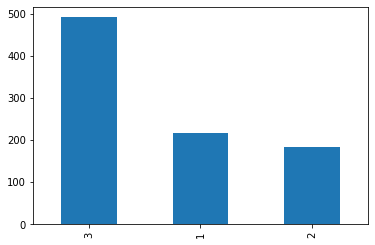

In [13]:
data.Pclass.value_counts().plot(kind='bar')

### c. Pie Charts

<AxesSubplot:ylabel='Pclass'>

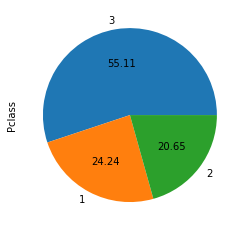

In [16]:
data.Pclass.value_counts().plot(kind='pie',autopct='%0.2f')

### d. Cummulative Frequency

The frequency is the number of times an event occurs within a gien scenario. Cummulative frequency is defined as the running total of frequencies, It is the sum of all the previous frequencies up to the current point. It is easily understandable through a cummulative frequency table

<img src = 'image1.png'>

In [18]:
a = data.Pclass.value_counts()
a

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
### Find the % of out data
pclass_percentage = ((a / a.sum())*100).values

In [22]:
pclass_percentage

array([55.10662177, 24.24242424, 20.65095398])

In [23]:
c = []
cumm_freq = 0

for i in pclass_percentage:
    cumm_freq += i
    c.append(cumm_freq)

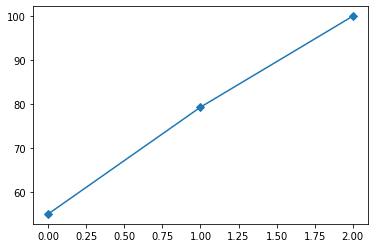

In [29]:
plt.plot(c,marker='D')

## 2. Working with Quantitatie/ numerical data

### a. Histogram

In [30]:
d = data.Age.values

c:\program files\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

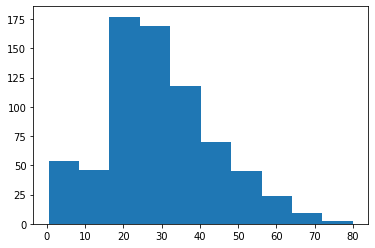

In [31]:
plt.hist(d)

##### Note: For numerical data we will use histogram whereas for categorical data bar chart is used.

### b. Boxplot

<AxesSubplot:xlabel='Age'>

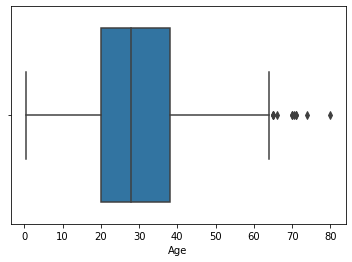

In [33]:
sns.boxplot('Age',data=data)

In [35]:
a = data.dropna(subset=['Age'])
a = a.Age.values
np.median(a)

28.0

### 3. Kdeplot

<AxesSubplot:xlabel='Age', ylabel='Density'>

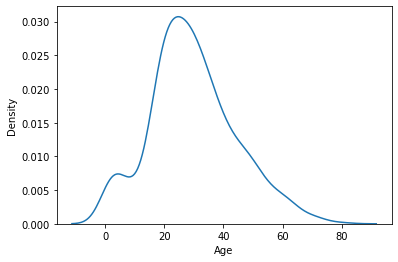

In [37]:
sns.kdeplot(data['Age'])

# Working with 2 variables/data (Bivariate analysis)

## 1. Categorical vs Numerical

### a. Box plot

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

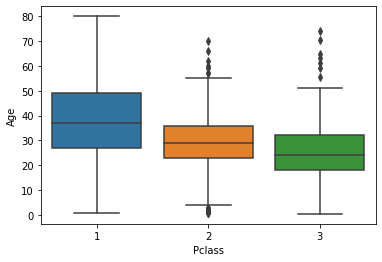

In [40]:
sns.boxplot(x='Pclass',y='Age',data=data)

### b. Bar Plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

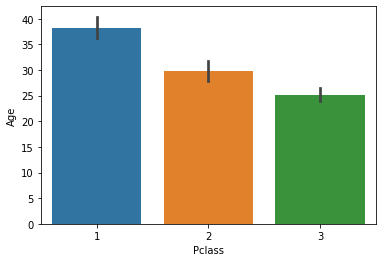

In [42]:
sns.barplot(x="Pclass",y="Age",data=data)   # It returns average

## 2. Numerical vs Numerical

### a. Scatter plot

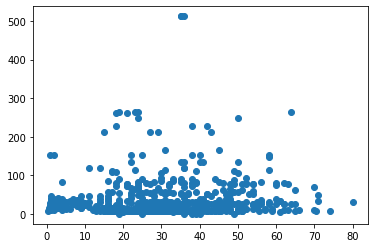

In [45]:
m = data.Age.values
n = data.Fare.values

plt.scatter(m,n)

## 3Categorical vs Categorical

### a. Cross Tables/ Contingency Table

In statistics, a contingency table(also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (Multivariate) frequency distribution of the variables.

<img src='image2.png'>

In [49]:
crosstb = pd.crosstab(data.Pclass,data.Sex)

In [50]:
crosstb

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


## b.Side by Side bar chart

<AxesSubplot:xlabel='Pclass'>

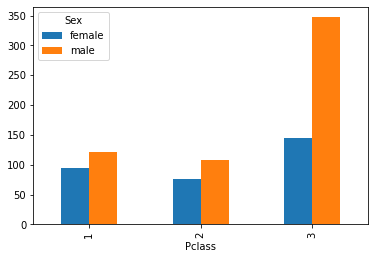

In [52]:
crosstb.plot(kind='bar')

### c. Heatmaps

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

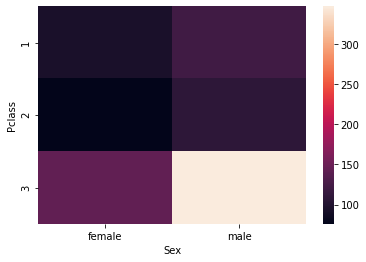

In [53]:
sns.heatmap(crosstb)